In [37]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency

In [38]:
# Loading the dataset
data = pd.read_csv('adult.csv')

In [39]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [40]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Univariate Analysis

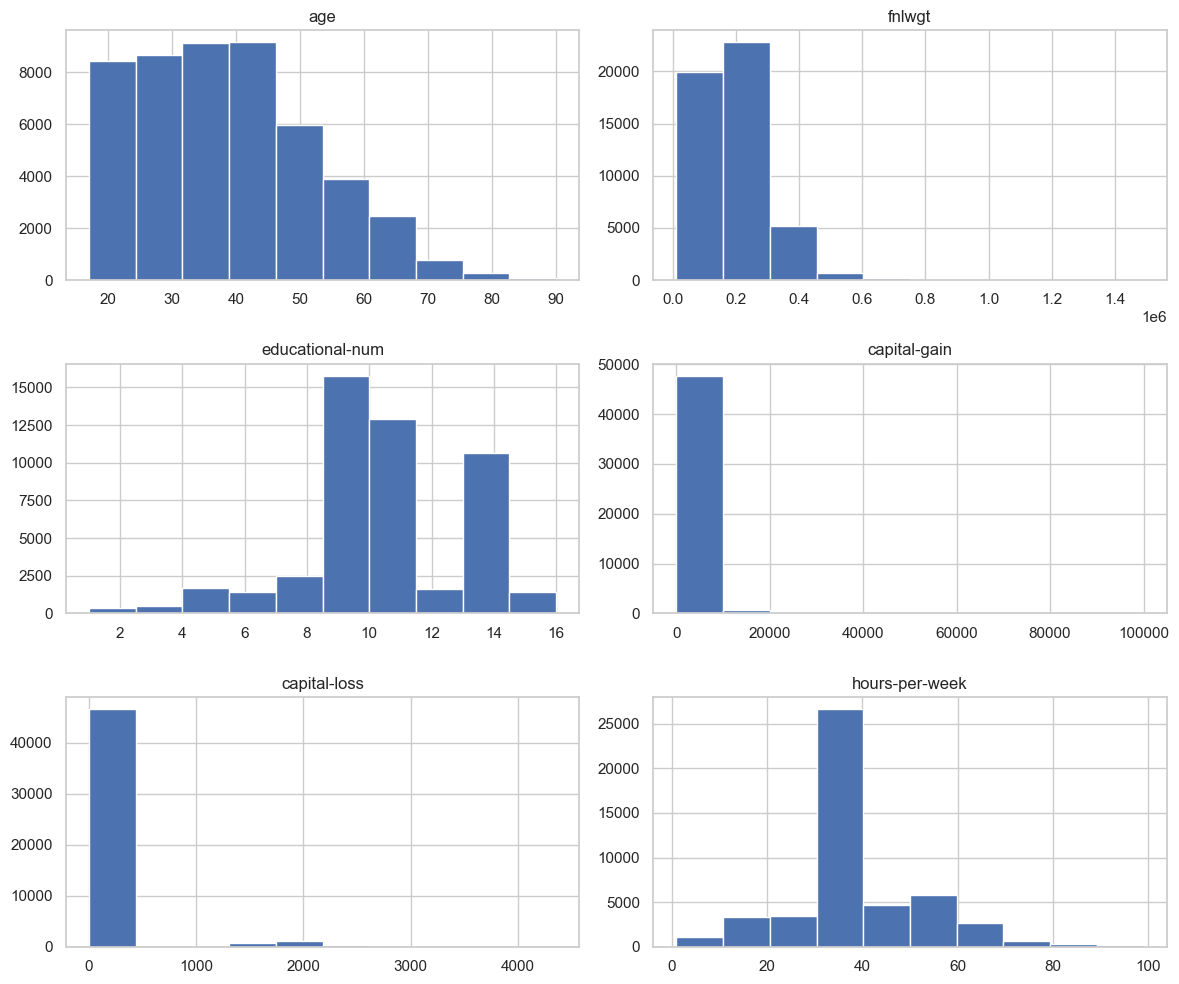

In [42]:
# Histograms
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

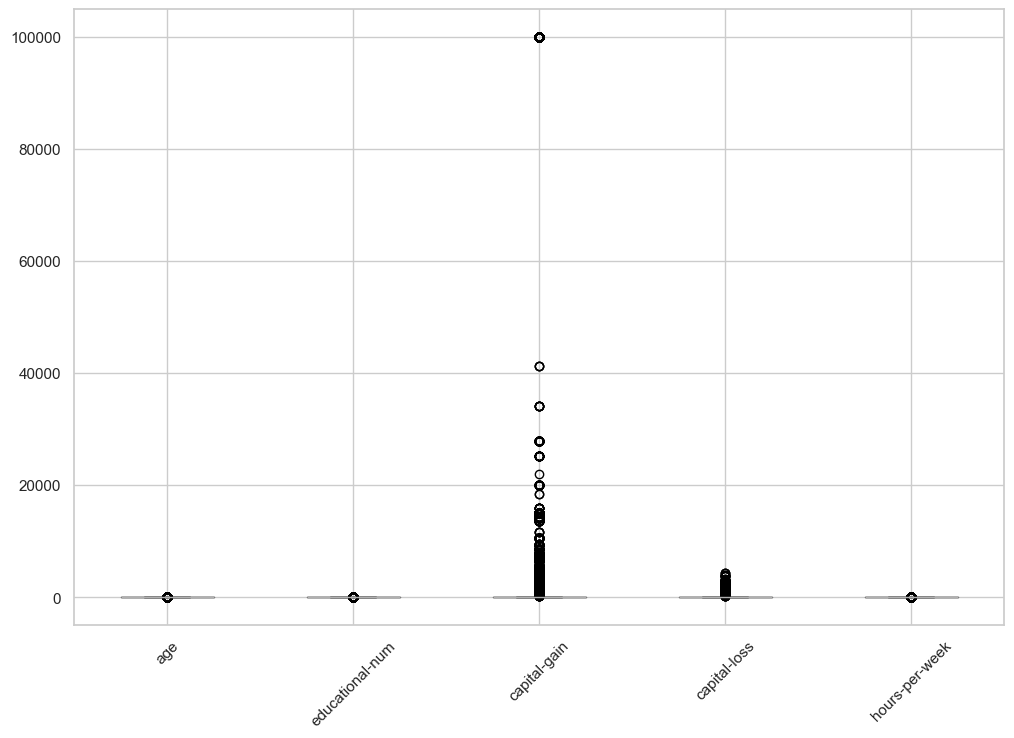

In [43]:
# Box plots
sns.set_theme(style='whitegrid')
data.drop('fnlwgt', axis=1).boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

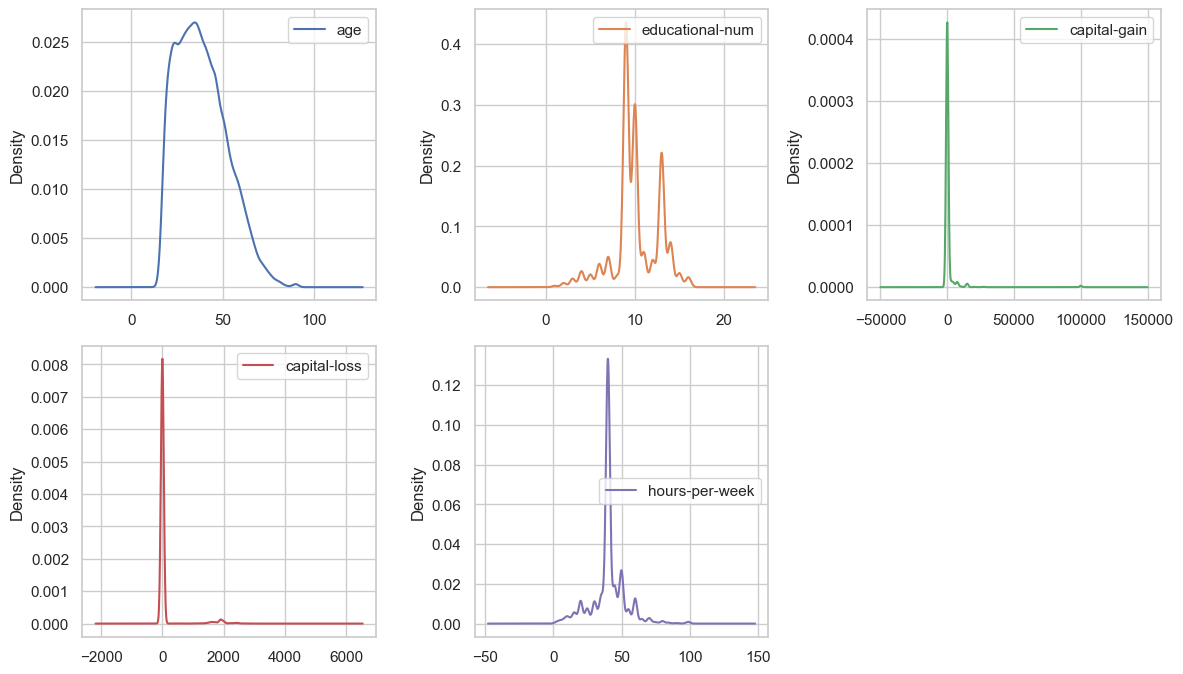

In [44]:
# Density plots
data.drop('fnlwgt', axis=1).plot(kind='density', subplots=True, layout=(3, 3), figsize=(12, 10), sharex=False)
plt.tight_layout()
plt.show()

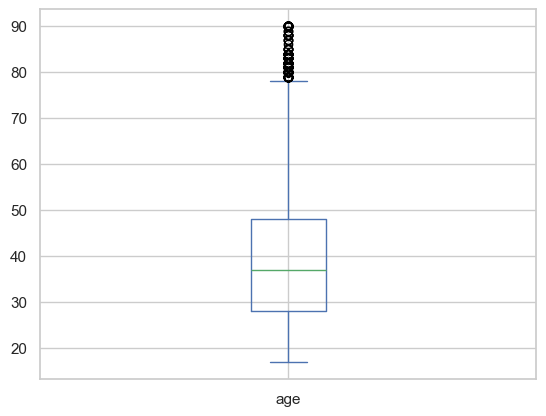

In [45]:
# Handling outliers and missing values
data['age'].plot(kind='box')
plt.show()

In [46]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [47]:
data['age'] = np.where(data['age'] < lower_bound, lower_bound, data['age'])
data['age'] = np.where(data['age'] > upper_bound, upper_bound, data['age'])

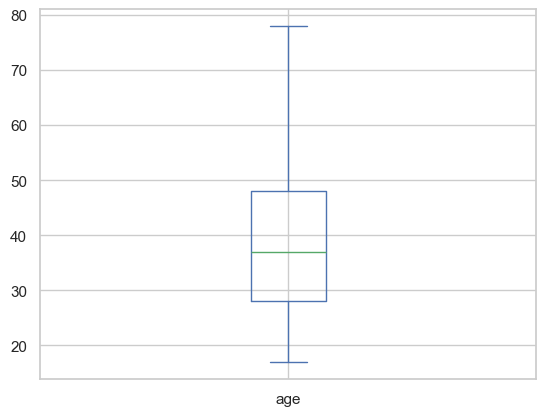

In [48]:
data['age'].plot(kind='box')
plt.show()

In [49]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Bivariate Analysis

In [50]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38.0,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28.0,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44.0,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18.0,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


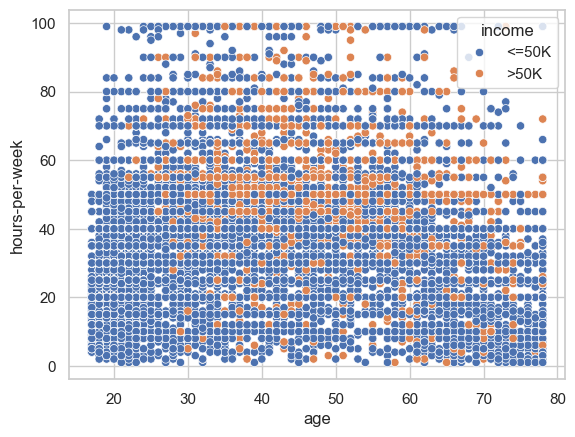

In [51]:
# Scatter plot
sns.scatterplot(data=data, x='age', y='hours-per-week', hue='income')
plt.show()

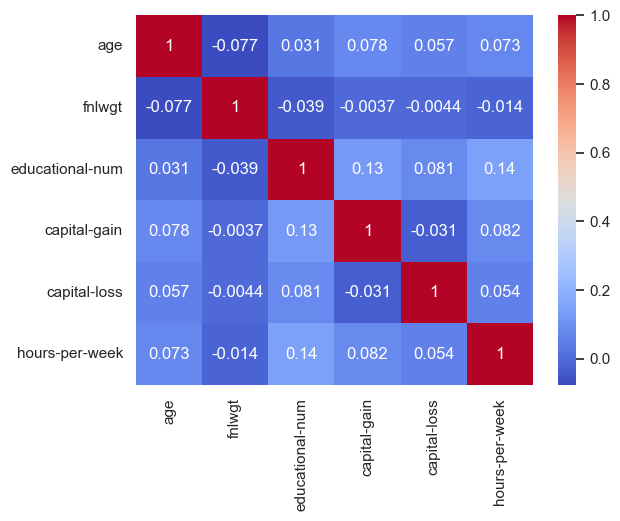

In [52]:
# Correlation analysis
numerical_cols = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [53]:
data['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [54]:
data['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [55]:
contingency_table = pd.crosstab(data['education'], data['income'])
contingency_table

income,<=50K,>50K
education,,
10th,1302,87
11th,1720,92
12th,609,48
1st-4th,239,8
5th-6th,482,27
7th-8th,893,62
9th,715,41
Assoc-acdm,1188,413
Assoc-voc,1539,522


In [56]:
chi2, p, dof, _ = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.5f}")

Chi-square statistic: 6537.97
p-value: 0.00000


# Multivariate Analysis

In [57]:
# PCA
X = data.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

In [59]:
principal_components

array([[-1.24082751,  0.40673958,  0.12913463, -0.00761699, -0.34888036,
         0.88381418],
       [ 0.21582634, -0.50394828, -0.45134461, -0.49982714, -0.81470416,
         0.56535235],
       [-0.29838425,  1.37406583,  0.88021885, -0.06609528,  0.08466658,
        -0.64564547],
       ...,
       [ 0.24752204, -0.91647649, -0.74505959,  0.84911585, -0.31635432,
        -0.34274168],
       [-1.68330893,  0.27487921, -0.04291942, -0.53340336,  1.12094254,
         0.0859709 ],
       [ 0.69435036,  0.96206889, -0.85006605,  1.69351089,  0.57610301,
         0.4747941 ]])

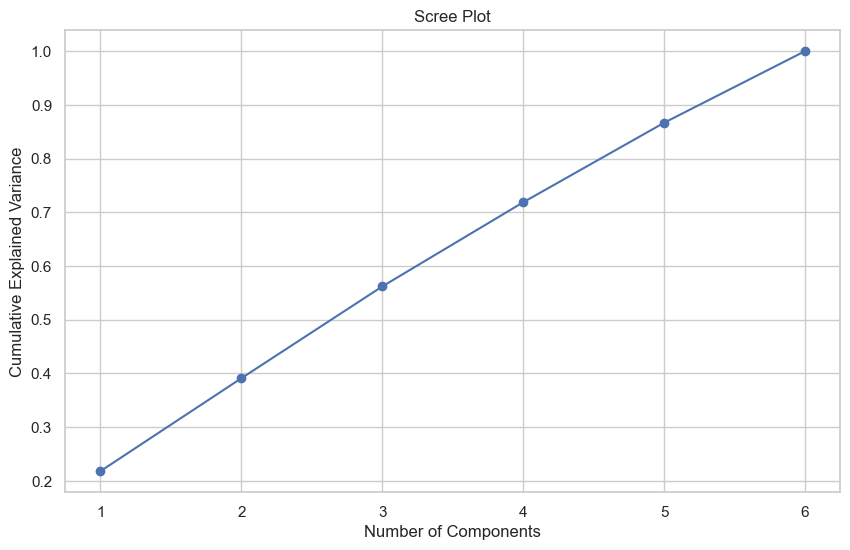

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [61]:
# K-means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [62]:
data['Cluster'] = kmeans.labels_

In [63]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'Cluster'],
      dtype='object')

In [64]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Cluster
0,25.0,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38.0,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,1
2,28.0,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0
3,44.0,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,18.0,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0


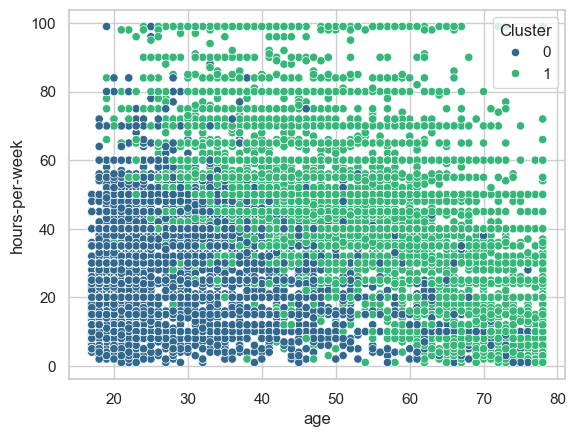

In [73]:
sns.scatterplot(data=data, x='age', y='hours-per-week', hue='Cluster', palette='viridis')
plt.show()

# Advanced EDA/Preprocessing Techniques

In [66]:
# Handling categorical variables
data['workclass'] = data['workclass'].astype('category')
data['workclass'] = data['workclass'].cat.codes

workclass_counts = data['workclass'].value_counts()

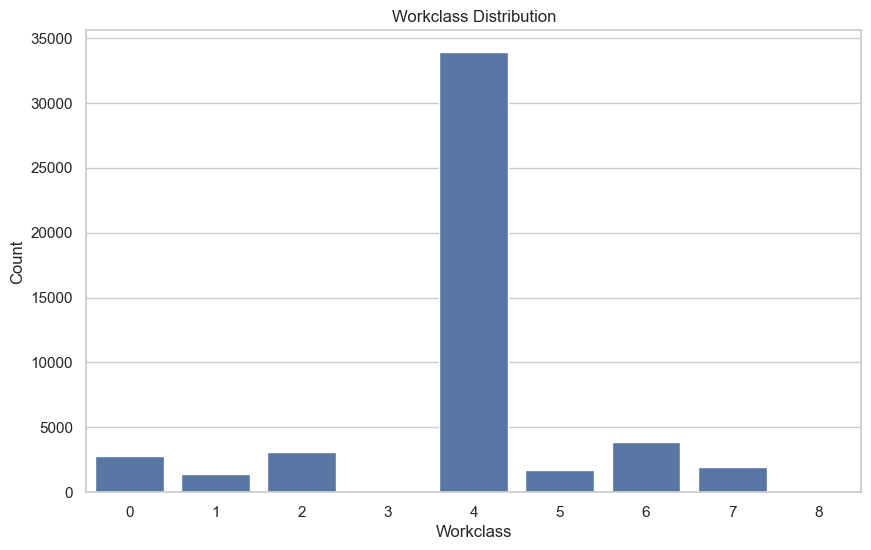

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x=workclass_counts.index, y=workclass_counts.values)
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Workclass Distribution')
plt.show()

In [68]:
# Tools and Libraries
data.info()

columns_to_encode = ['education', 'marital-status', 'gender', 'occupation', 'relationship', 'race', 'native-country', 'income']
label_encoder = LabelEncoder()

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48842 non-null  float64
 1   workclass        48842 non-null  int8   
 2   fnlwgt           48842 non-null  int64  
 3   education        48842 non-null  object 
 4   educational-num  48842 non-null  int64  
 5   marital-status   48842 non-null  object 
 6   occupation       48842 non-null  object 
 7   relationship     48842 non-null  object 
 8   race             48842 non-null  object 
 9   gender           48842 non-null  object 
 10  capital-gain     48842 non-null  int64  
 11  capital-loss     48842 non-null  int64  
 12  hours-per-week   48842 non-null  int64  
 13  native-country   48842 non-null  object 
 14  income           48842 non-null  object 
 15  Cluster          48842 non-null  int32  
dtypes: float64(1), int32(1), int64(5), int8(1), object(8)
memo

In [69]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Cluster
0,25.0,4,226802,1,7,4,7,3,2,1,0,0,40,39,0,0
1,38.0,4,89814,11,9,2,5,0,4,1,0,0,50,39,0,1
2,28.0,2,336951,7,12,2,11,0,4,1,0,0,40,39,1,0
3,44.0,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1,1
4,18.0,0,103497,15,10,4,0,3,4,0,0,0,30,39,0,0


In [70]:
# Feature Importance
# Chi-square test for categorical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data['income'])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    print(f"Feature: {feature}")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"p-value: {p:.5f}")
    print()

Feature: workclass
Chi-square statistic: 1610.75
p-value: 0.00000

Feature: education
Chi-square statistic: 6537.97
p-value: 0.00000

Feature: marital-status
Chi-square statistic: 9816.02
p-value: 0.00000

Feature: occupation
Chi-square statistic: 5983.16
p-value: 0.00000

Feature: relationship
Chi-square statistic: 10088.72
p-value: 0.00000

Feature: race
Chi-square statistic: 487.03
p-value: 0.00000

Feature: gender
Chi-square statistic: 2248.85
p-value: 0.00000

Feature: native-country
Chi-square statistic: 452.23
p-value: 0.00000



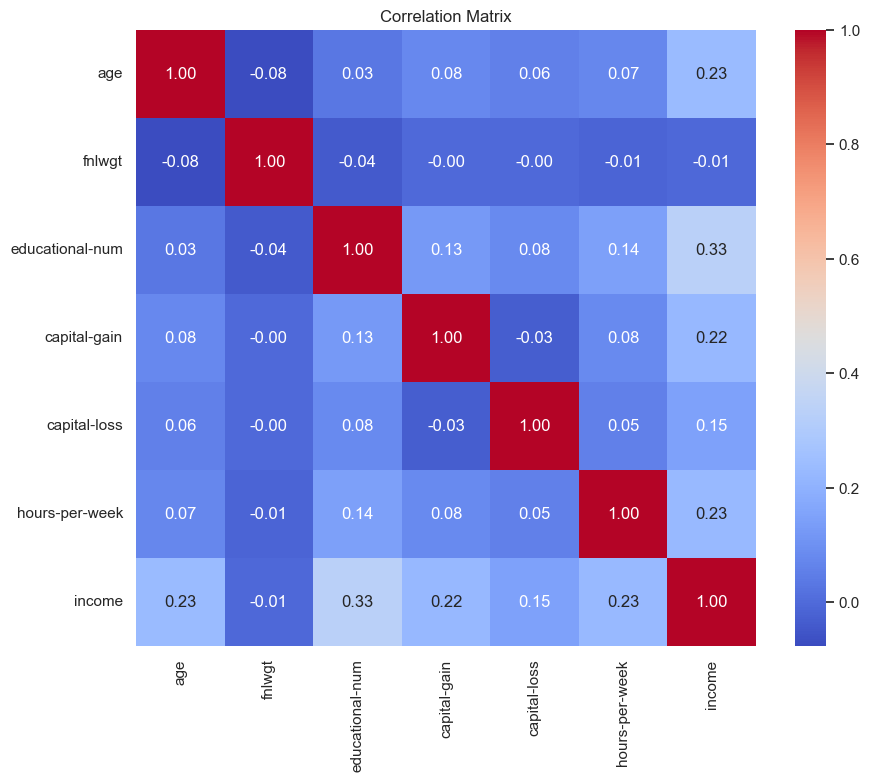

In [71]:
# Correlation analysis for numerical features
numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

corr_matrix = data[numerical_features + ['income']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

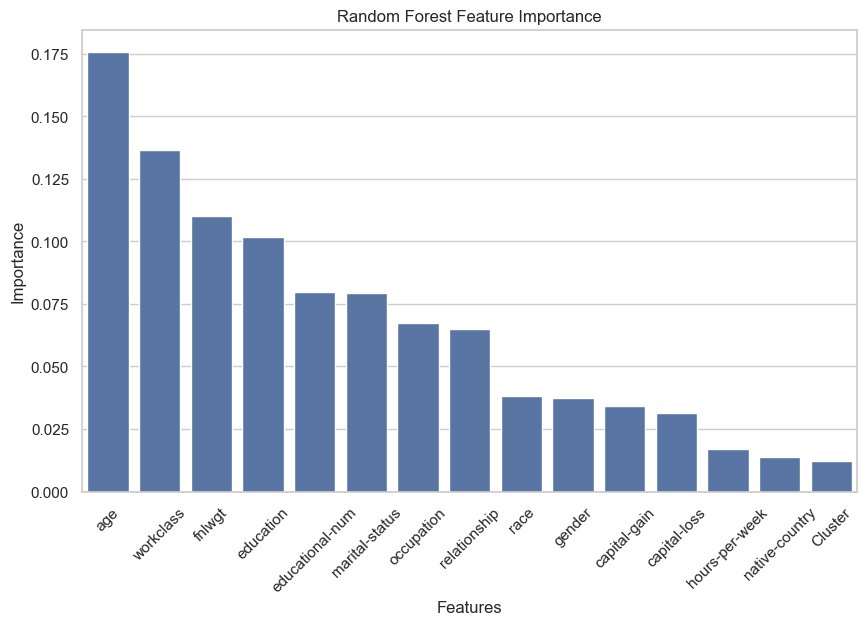

In [72]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop('income', axis=1)
y = data['income']

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

importances = rf_classifier.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]
importances = importances[indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)
plt.show()